<a href="https://colab.research.google.com/github/shoulhafiz/python_data_science/blob/master/kmeans_dimensional_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://malaya-dataset.s3-ap-southeast-1.amazonaws.com/tutorial/wholesale-customer.csv

--2019-11-06 07:11:52--  https://malaya-dataset.s3-ap-southeast-1.amazonaws.com/tutorial/wholesale-customer.csv
Resolving malaya-dataset.s3-ap-southeast-1.amazonaws.com (malaya-dataset.s3-ap-southeast-1.amazonaws.com)... 52.219.40.247
Connecting to malaya-dataset.s3-ap-southeast-1.amazonaws.com (malaya-dataset.s3-ap-southeast-1.amazonaws.com)|52.219.40.247|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15021 (15K) [text/csv]
Saving to: ‘wholesale-customer.csv’

wholesale-customer. 100%[===================>]  14.67K  --.-KB/s    in 0s      

2019-11-06 07:11:58 (225 MB/s) - ‘wholesale-customer.csv’ saved [15021/15021]



In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('wholesale-customer.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [0]:
from sklearn.cluster import KMeans


In [0]:
kmean = KMeans(n_clusters = 5).fit(df)
labels = kmean.labels_

In [13]:
df.shape
df.describe()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2).fit(df)
X = pca.transform(df)
centroids = pca.transform(kmean.cluster_centers_)


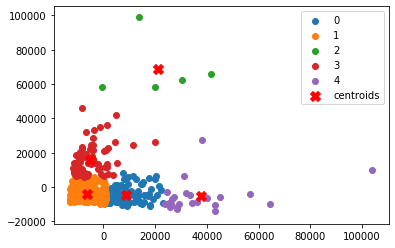

In [18]:
import matplotlib.pyplot as plt

for label in np.unique(labels):
  filtered = X[labels == label]
  plt.scatter(filtered[:,0], filtered[:,1], label = label)

plt.scatter(centroids[:,0], centroids[:,1],
            label = 'centroids', marker = 'X', s = 100, c = 'red')
plt.legend()
plt.show()


In [0]:
from sklearn.manifold import TSNE

X = TSNE().fit_transform(df)
#centroids = TSNE().fit_transform(kmean.cluster_centers_)


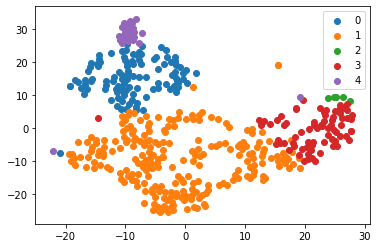

In [20]:
for label in np.unique(labels):
  filtered = X[labels == label]
  plt.scatter(filtered[:,0], filtered[:,1], label = label)

# plt.scatter(centroids[:,0], centroids[:,1],
#             label = 'centroids', marker = 'X', s = 100, c = 'red')
plt.legend()
plt.show()